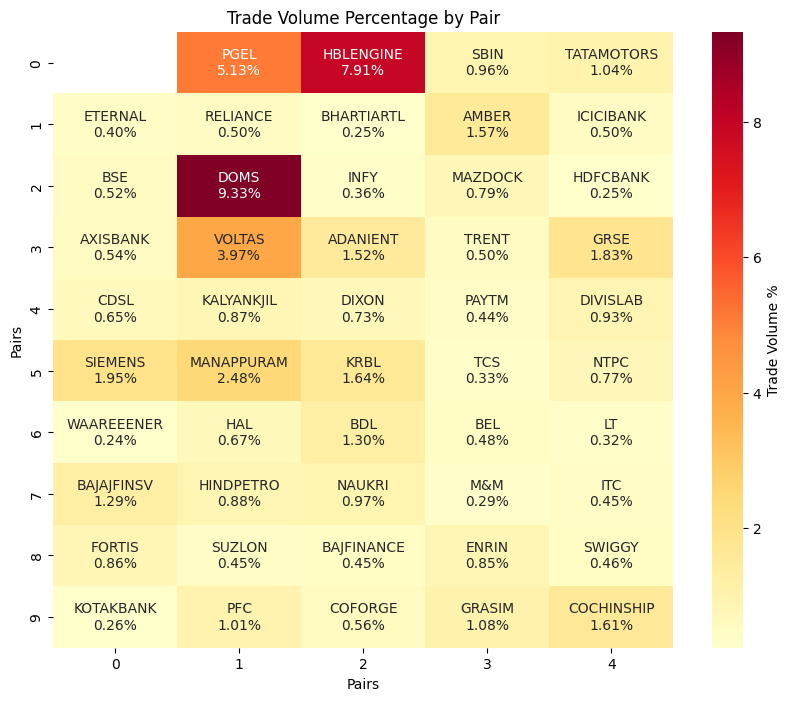

In [17]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import requests
import pandas as pd

import rookiepy
from tradingview_screener import Query
cookies = rookiepy.to_cookiejar(rookiepy.brave(['.tradingview.com']))  # replace chrome() with your browser
# Query.get_scanner_data(cookies=cookies) 
query = Query() 
query.set_markets('india')

query.get_scanner_data(cookies=cookies)

total_count, dataframe = query.select('name', 'close', 'volume', 'relative_volume_10d_calc','volume_change|5','relative_volume_intraday|5','relative_volume','VWMA',).get_scanner_data(cookies=cookies)
dataframe.size
x=10
y=5
df = dataframe[['name', 'relative_volume']].copy()
df['relative_volume'] = df['relative_volume'].astype(float)  # Ensure the column is float type  
df['name'] = df['name'].astype(str)  # Ensure the column is string type
pairs_reshaped = df['name'].values.reshape(x, y)
trade_volume_percentage_reshaped = df['relative_volume'].values.reshape(x, y)
annotations = [f"{name}\n{value:.2f}%" for name, value in zip(pairs_reshaped.flatten(), trade_volume_percentage_reshaped.flatten())]
annotations = np.array(annotations).reshape(x, y)

plt.figure(figsize=(10, 8))
sn.heatmap(trade_volume_percentage_reshaped, annot=annotations, fmt="", cmap='YlOrRd', cbar_kws={'label': 'Trade Volume %'})
plt.title('Trade Volume Percentage by Pair')
plt.xlabel('Pairs')
plt.ylabel('Pairs')
plt.show()
